In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import category_encoders as ce

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [229]:
%store -r X_train1
%store -r X_test1
%store -r y_train1
%store -r y_test1

In [230]:
X_train1 = X_train1.drop(columns=['id', 'affiliate_provider', 'signup_app', 'first_device_type', 
                                   'affiliate_channel', 'english_lan', 'first_browser', 'country_destination'])
X_test1 = X_test1.drop(columns=['id', 'affiliate_provider', 'signup_app', 'first_device_type', 
                                'affiliate_channel', 'english_lan', 'first_browser', 'country_destination'])

In [231]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149415 entries, 165652 to 121958
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         149415 non-null  object
 1   signup_method  149415 non-null  object
 2   age_bins       149415 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [232]:
le = LabelEncoder()
ohe = OneHotEncoder()
classifier = DecisionTreeClassifier(random_state=10)

In [233]:
# Label encoding
y_train_le = le.fit_transform(y_train1)
y_test_le = le.fit_transform(y_test1)

In [234]:
# One hot encoding
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train1)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_UNKNOWN,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,age_bins_unknown,age_bins_35-39,age_bins_30-34,...,age_bins_20-24,age_bins_25-29,age_bins_45-49,age_bins_50-54,age_bins_59-64,age_bins_15-19,age_bins_65-69,age_bins_55-59,age_bins_75+,age_bins_69-74
165652,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
211779,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9578,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
171041,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
182734,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
X_test_ohe = ohe.fit_transform(X_test1)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_FEMALE,gender_UNKNOWN,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,age_bins_25-29,age_bins_unknown,age_bins_50-54,...,age_bins_35-39,age_bins_30-34,age_bins_69-74,age_bins_20-24,age_bins_55-59,age_bins_40-44,age_bins_59-64,age_bins_65-69,age_bins_15-19,age_bins_75+
153649,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
161993,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81536,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36756,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74429,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [236]:

# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, max_depth=4, random_state=20)
forest.fit(X_train_ohe, y_train_le)

RandomForestClassifier(max_depth=4, n_estimators=25, random_state=20)

In [237]:
# Training accuracy score
print("Training Accuracy for Random Forest: {:.4}%".format(forest.score(X_train_ohe, y_train_le) * 100))

# Test accuracy score
print("Test Accuracy for Random Forest: {:.4}%".format(forest.score(X_test_ohe, y_test_le) * 100))

Training Accuracy for Random Forest: 68.73%
Test Accuracy for Random Forest: 45.27%


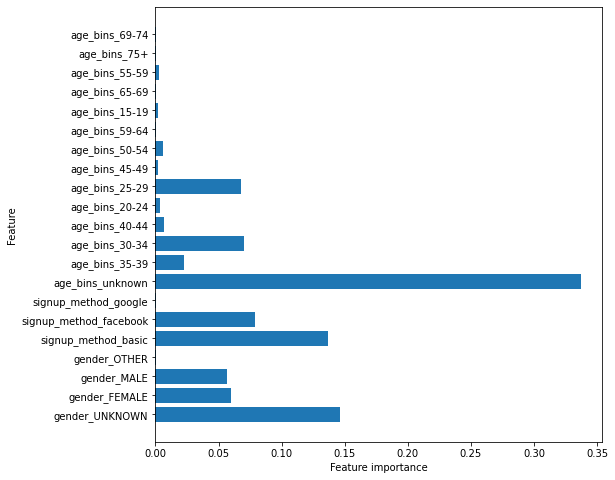

In [238]:

def plot_feature_importances(model):
    n_features = X_train_ohe.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_ohe.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [239]:
forest_pred = forest.predict(X_test_ohe)

In [240]:
# Classification report
print(classification_report(y_test_le, forest_pred))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41     37206
           1       0.40      0.63      0.49     26830

    accuracy                           0.45     64036
   macro avg       0.48      0.48      0.45     64036
weighted avg       0.49      0.45      0.44     64036



In [241]:
## logistic regression

In [242]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc


In [243]:

logreg = LogisticRegression()
le = LabelEncoder()
ohe = OneHotEncoder()

In [245]:
y_train_le = le.fit_transform(y_train1)
print(y_train_le)

[0 0 1 ... 1 0 0]


In [247]:
y_test_le = le.fit_transform(y_test1)

In [249]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train1)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_UNKNOWN,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,age_bins_unknown,age_bins_35-39,age_bins_30-34,...,age_bins_20-24,age_bins_25-29,age_bins_45-49,age_bins_50-54,age_bins_59-64,age_bins_15-19,age_bins_65-69,age_bins_55-59,age_bins_75+,age_bins_69-74
165652,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
211779,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9578,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
171041,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
182734,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
X_test_ohe = ohe.fit_transform(X_test1)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_FEMALE,gender_UNKNOWN,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,age_bins_25-29,age_bins_unknown,age_bins_50-54,...,age_bins_35-39,age_bins_30-34,age_bins_69-74,age_bins_20-24,age_bins_55-59,age_bins_40-44,age_bins_59-64,age_bins_65-69,age_bins_15-19,age_bins_75+
153649,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
161993,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81536,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36756,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74429,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [251]:

# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train_ohe, y_train_le)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [252]:
# Generate predictions
y_hat_train = logreg.predict(X_train_ohe)
y_hat_test = logreg.predict(X_test_ohe)

In [253]:
residuals = np.abs(y_train_le - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    102686
1     46729
dtype: int64
------------------------------------
0    0.687254
1    0.312746
dtype: float64


In [254]:

residuals = np.abs(y_test_le - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

1    34974
0    29062
dtype: int64
------------------------------------
1    0.546162
0    0.453838
dtype: float64


In [255]:
print('Training Precision: ', precision_score(y_train_le, y_hat_train))
print('Testing Precision: ', precision_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train_le, y_hat_train))
print('Testing Recall: ', recall_score(y_test_le, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_le, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test_le, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train_le, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test_le, y_hat_test))

Training Precision:  0.6684149312032303
Testing Precision:  0.4019456752070892



Training Recall:  0.4906569154934115
Testing Recall:  0.6221393961982855



Training Accuracy:  0.6872536224609309
Testing Accuracy:  0.45383846586295207



Training F1-Score:  0.5659052272706161
Testing F1-Score:  0.4883700517861845
